# Investigating Stellar Color and Brightness with Hubble Images

Two easily observable properties of stars, color and brightness, can tell us a lot about how stars change as they evolve throughout their lives. In this tutorial we'll be walking through the steps that astronomers take to make measurements of the brightnesses and colors of stars.

The embedded video demonstrates how the colors and brightnesses of stars correspond to real physical properties.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/PsS80huL47c"\
frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope;\
picture-in-picture" allowfullscreen></iframe>')

We're going to be using a pre-prepared dataset from a Hubble Space Telescope project called the [HST UV Globular Cluster Survey ("HUGS")](https://archive.stsci.edu/prepds/hugs/). We'll be looking at the globular cluster [NGC5053](https://en.wikipedia.org/wiki/NGC_5053).

<img src="data/NGC5053_color.jpg">

First, let's import the packages we need to get started. We're going to be getting our data from FITS files using Astropy's [FITS module](http://docs.astropy.org/en/stable/io/fits/), and analyzing it using [SEP](https://sep.readthedocs.io/en/stable/), a package designed to detect and measure sources* in astronomical images. We'll be using the Astropy `Table` module to work with the quantities that we measure from our images.

*The word "source" is used in observational astronomy to denote anything that puts out light; for our purposes here it means stars and galaxies.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import sep

## Working with astronomical image data

Here we read in the image from one of our data files and take a quick look at it.

In [3]:
# read the data into an in-memory array we can do calculations on
data_blue = fits.getdata('data/NGC5053_blue.fits').byteswap().newbyteorder()

The `byteswap().newbyteorder()` part above is only necessary because we're using SEP, which has some specific preferences for handling image data. If you're not using SEP you can leave it out.

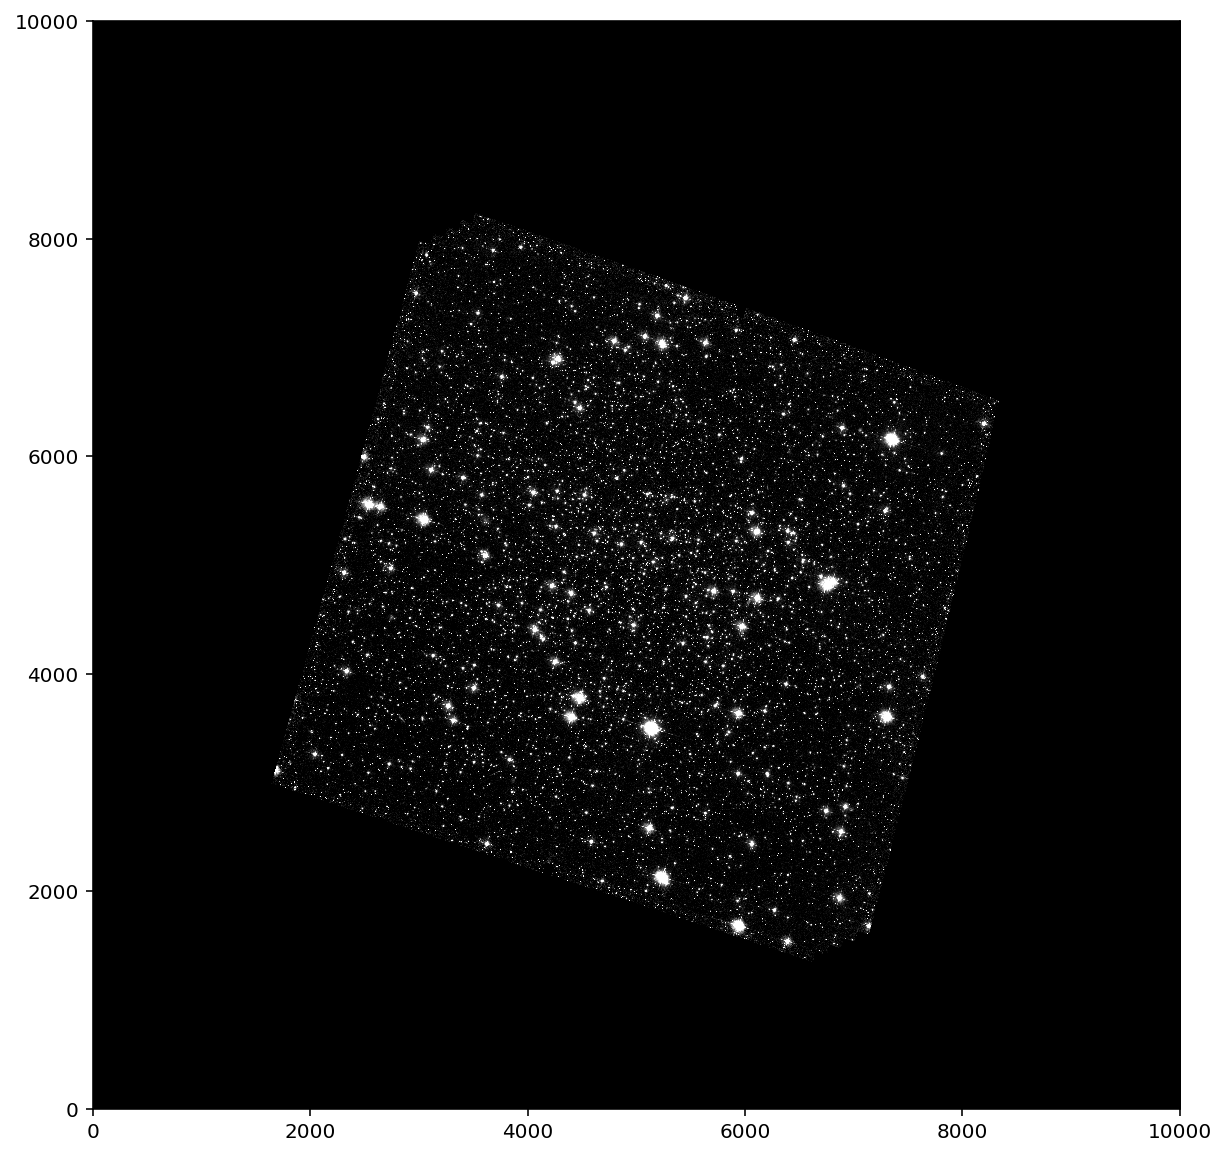

In [4]:
# make a plot and show the image
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')

Here, the `vmin` and `vmax` arguments in `imshow` tell matplotlib to map all pixels in the image that have a value of 0 or less to black, and all pixels in the image that have a value of 0.2 or more to white. The `origin` argument tells matplotlib to orient the image so that the (0,0) pixel coordinate is at the lower left corner (the default is the upper left, which works for most image file types like PNG and JPEG, but not FITS).

Now let's zoom in on the middle and take a closer look.

(4500, 5500)

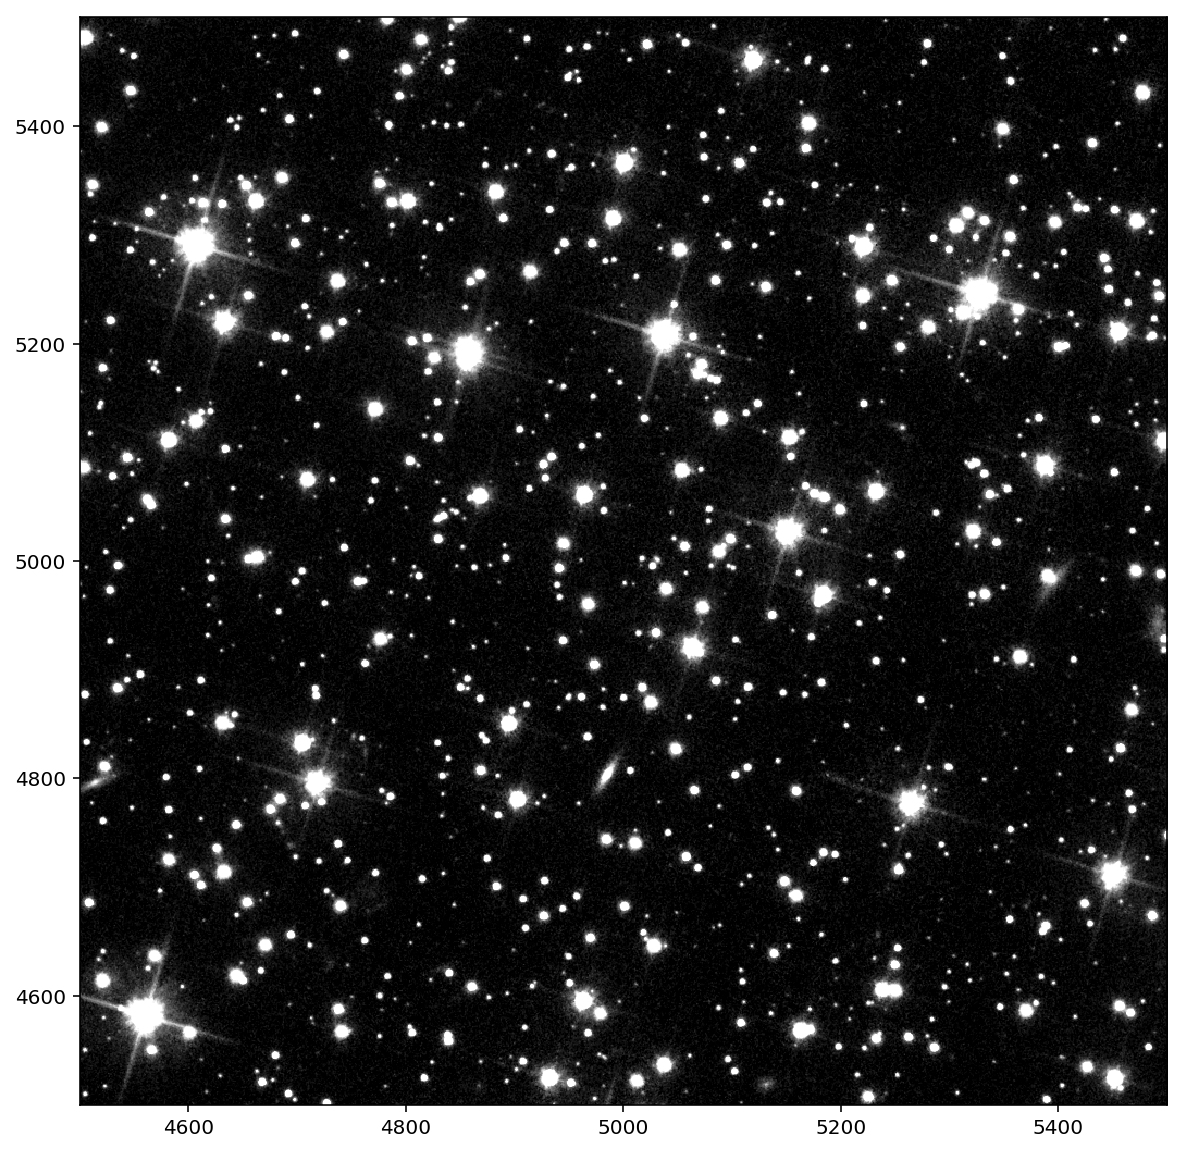

In [5]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')
ax.set_xlim(4500,5500) # constrains the x-axis of the plot to the middle 1000 pixels of the 10,000x10,000 image 
ax.set_ylim(4500,5500) # same for the y-axis

In [6]:
data_sample = data_blue[4500:5500,4500:5500]
object_threshold = 5*data_sample.std()
print(object_threshold)

11.1177432537


In [7]:
objects = sep.extract(data_blue, thresh=object_threshold)
x, y = objects['x'], objects['y']

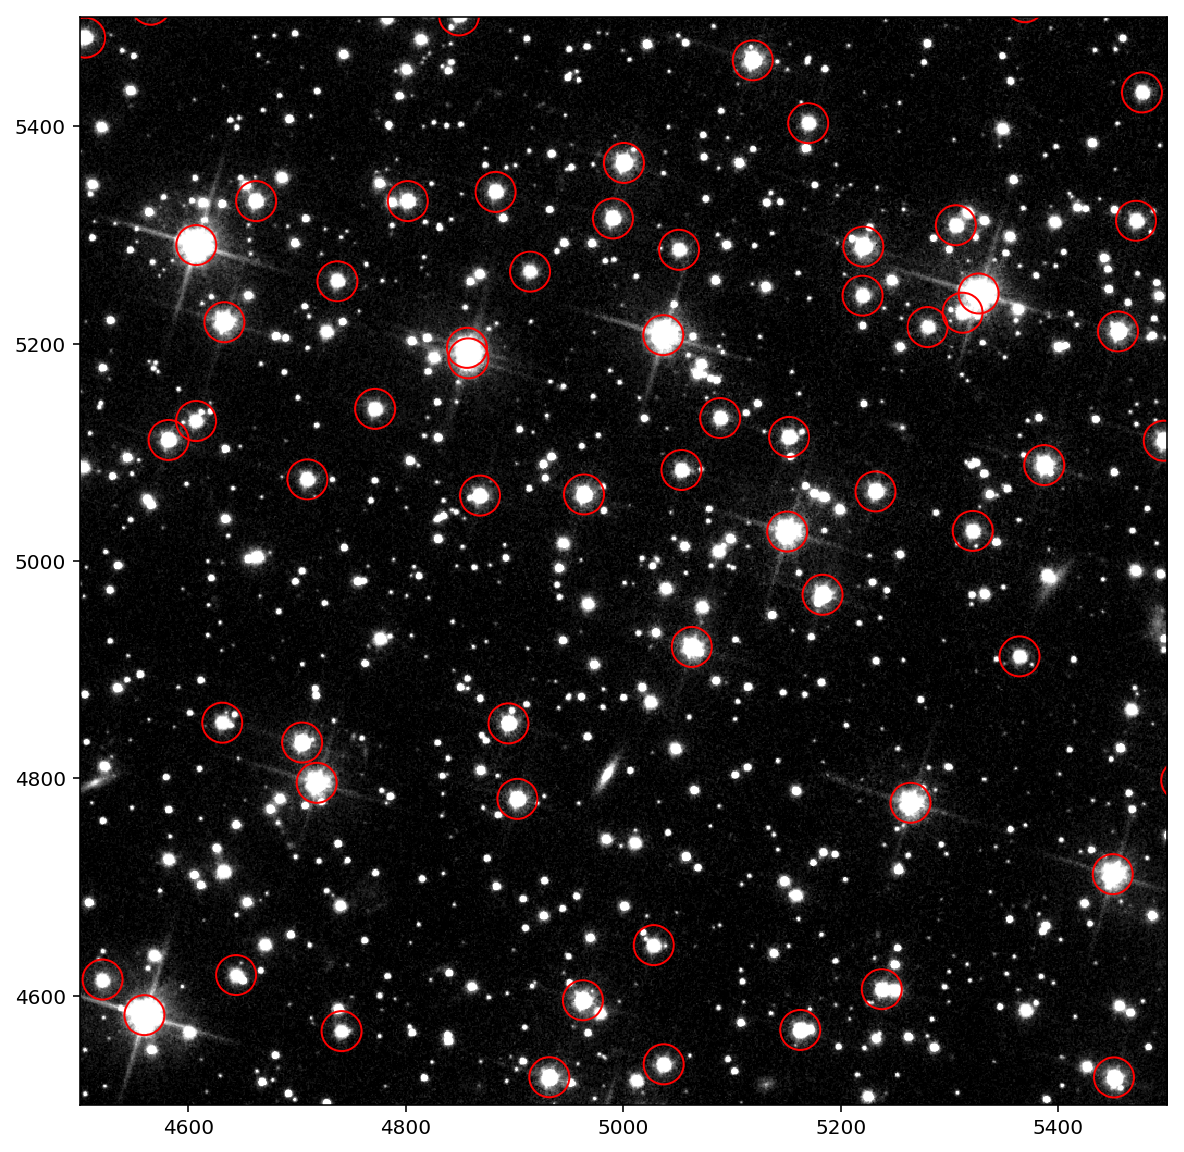

In [8]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')
ax.set_xlim(4500,5500)
ax.set_ylim(4500,5500)

ax.scatter(x, y, color="None", edgecolors='red', s=20**2)

In [9]:
flux, fluxerr, flag = sep.sum_circle(data_blue, x, y, 20)

In [10]:
object_table = Table(names=['x', 'y', 'flux'],
                     data=[x, y, flux])
object_table

x,y,flux
float64,float64,float64
6808.33791716,1521.24312225,444.303285152
6769.46347734,1523.18541864,583.592614766
6709.61739156,1528.47674098,1325.67660685
6345.60559754,1543.97385756,1742.41552297
6384.34582281,1540.00857509,18930.3436217
6979.01056235,1555.01159634,325.00026477
6774.63508384,1572.94175889,168.412535911
6372.30930561,1585.92195949,1177.43766447
6776.96003855,1607.58970601,1007.70016516


In [11]:
object_table.write('NGC5053_blue_stars.txt', format='ascii', overwrite=True)

## Your turn: do the same thing for the red image.